# 3) Loading Packages and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections

import scipy.stats


# Reading the data

In [2]:

# read in all our data
data = pd.read_csv("Bondora_raw.csv")



# 4) Data Structure and Content

In [3]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [5]:
data.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [7]:
data.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [6]:
data['AmountOfPreviousLoansBeforeLoan'].value_counts()

0.00        66647
530.00       2897
2125.00      2542
4250.00      2311
1060.00      1913
            ...  
23832.00        1
1974.00         1
14835.00        1
16925.00        1
1266.94         1
Name: AmountOfPreviousLoansBeforeLoan, Length: 12005, dtype: int64

In [7]:
data['Age'].value_counts()


34    4083
29    3985
37    3959
31    3959
35    3958
      ... 
77       3
1        2
71       2
76       1
74       1
Name: Age, Length: 62, dtype: int64

In [8]:
data['Age'].mean()

40.819295467891685

In [9]:
data['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

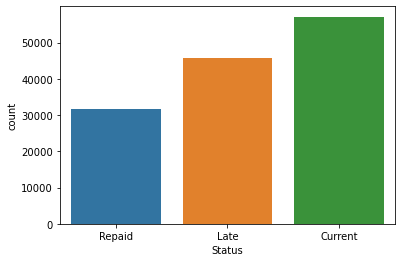

In [10]:
sns.countplot(data.Status)

In [11]:
data['Country'].value_counts()

EE    77335
FI    32650
ES    24248
SK      296
Name: Country, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

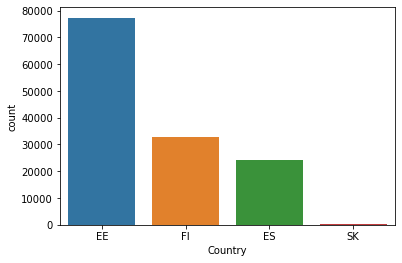

In [12]:
sns.countplot(data.Country)

In [13]:
data['City'].value_counts()

Tallinn                       15604
TALLINN                        6146
Tartu linn                     3326
HELSINKI                       3294
Pärnu linn                     1986
                              ...  
KOSE VALD, ARDU                   1
KALAMAJA                          1
LLERENA                           1
SALME VALD, TEHUMARDI KÜLA        1
VEĽKÉ DRŽKOVCE                    1
Name: City, Length: 7733, dtype: int64

# 5) Exploratory Data Analysis
Find the normality, and consistency of the data

In [14]:
data['Education'].value_counts()

 4.0    51330
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

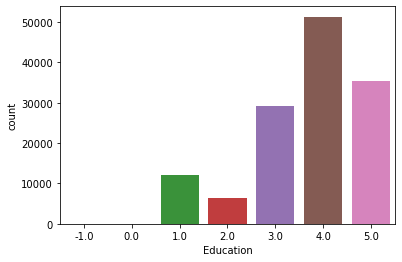

In [15]:
sns.countplot(data.Education)

# Encode the numerical data to nominal data

In [16]:
modifed_data = data.copy()
#modifedData = data.copy()



In [17]:
modifed_data['Education'] = modifed_data['Education'].replace({1: 'Primary education', 2: 'Basic education', 3: 'Vocational education', 4: 'Secondary education', 5: 'Higher education'})


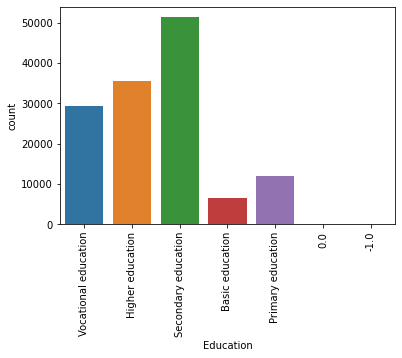

In [18]:
sns.countplot(x='Education', data=modifed_data)
plt.xticks(rotation=90)
plt.show()

In [19]:
modifed_data = modifed_data[(modifed_data['Education'] != -1) & (modifed_data['Education'] != 0)]


# Since we have two values that are not within the 5 categories, we will delete them

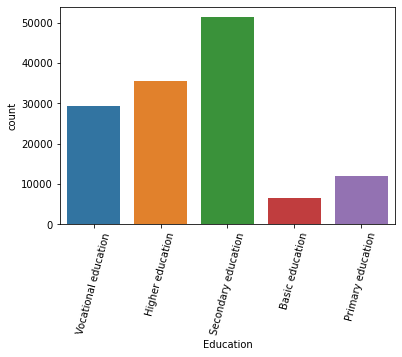

In [20]:
sns.countplot(x='Education', data=modifed_data)
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:xlabel='HomeOwnershipType', ylabel='count'>

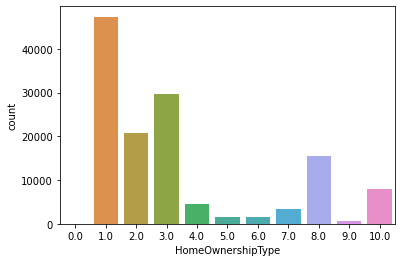

In [21]:
sns.countplot(modifed_data.HomeOwnershipType)

In [88]:
modifed_data['HomeOwnershipType'] = modifed_data['HomeOwnershipType'].replace({0: 'Homeless', 1: 'Owner',
                                                                               2: 'Living with parents', 3: 'Tenant, pre-furnished property',
                                                                               4: 'Tenant, unfurnished property', 5: 'Council house',
                                                                               6: 'Joint tenant',7: 'Joint ownership',
                                                                               8: 'Mortgage', 9: 'Owner with encumbrance', 10: 'Other' })


In [89]:
modifed_data = modifed_data[modifed_data['HomeOwnershipType'] != -1]


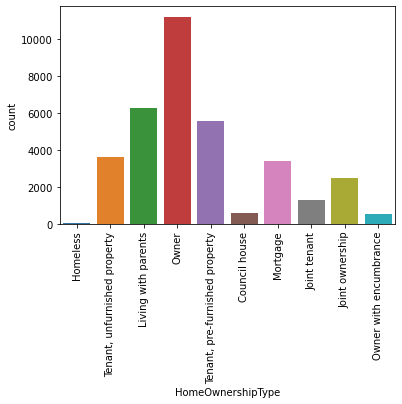

In [90]:
sns.countplot(x='HomeOwnershipType', data=modifed_data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

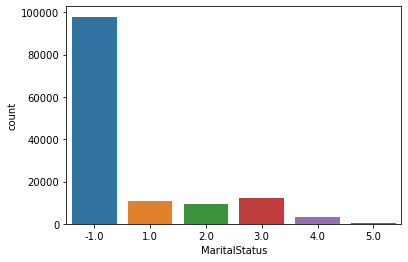

In [26]:
sns.countplot(modifed_data.MaritalStatus)

In [28]:
modifed_data = pd.read_csv('Bondora_raw.csv')

In [29]:
modifed_data['MaritalStatus'] = modifed_data['MaritalStatus'].replace({ 1: 'Married',
                                                                               2: 'Cohabitant',  3: 'Single',
                                                                               4: 'Divorced', 5: 'Widow'})


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

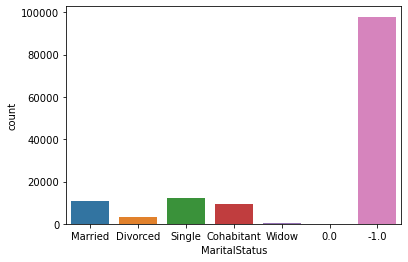

In [30]:
sns.countplot(modifed_data.MaritalStatus)

# We have encoding error; 0 and -1, will both be deleted

In [33]:


modifed_data = modifed_data[(modifed_data['MaritalStatus'] != -1) & (modifed_data['MaritalStatus'] != 0)]



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

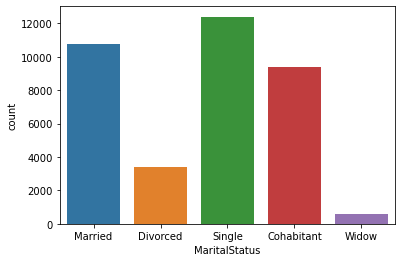

In [34]:
sns.countplot(modifed_data.MaritalStatus)

<AxesSubplot:xlabel='Gender', ylabel='count'>

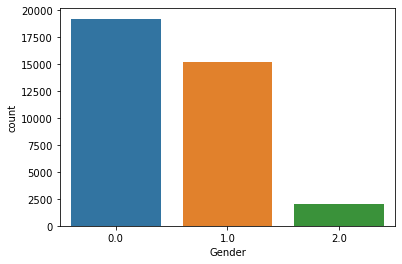

In [35]:
sns.countplot(modifed_data.Gender)

In [36]:
modifed_data['Gender'] = modifed_data['Gender'].replace({ 0.0: 'Male', 1.0: 'Woman',  2.0: 'Undefined'})


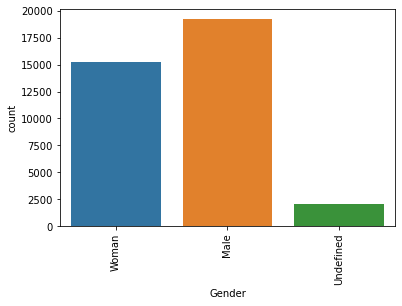

In [37]:
sns.countplot(x='Gender', data=modifed_data)
plt.xticks(rotation=90)
plt.show()

In [44]:
modifed_data

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1040.06,180+
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,0,2017-06-27,2018-06-20,NaN,NaN,NaN,NaN,0.0,0.00,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,0,NaN,NaN,NaN,0.0,60.0,NaN,0.0,1051.85,8-15
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,0,2016-04-01,2016-10-03,NaN,NaN,NaN,NaN,0.0,889.50,31-60


In [41]:
modifed_data.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  23146
ReScheduledOn                          28596
PrincipalDebtServicingCost                 0
InterestAndPenaltyDebtServicingCost        0
ActiveLateLastPaymentCategory          17967
Length: 112, dtype: int64

In [45]:

drop_cols=['BidsApi', 'BidsPortfolioManager', 'BidsPortfolioManager', 'BidsManual',
           'CurrentDebtDaysPrimary', 'CurrentDebtDaysPrimary', 'PrincipalOverdueBySchedule', 
           'PrincipalOverdueBySchedule', 'PrincipalOverdueBySchedule', 'IncomeFromPrincipalEmployer',
           'IncomeFromPension', 'EAD1', 'EAD2', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
           'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'ReportAsOfEOD', 'LoanId','LoanNumber',
           'ListedOnUTC','DateOfBirth','BiddingStartedOn','UserName','LoanApplicationStartedDate','FirstPaymentDate',
           'LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday',
           'ActiveScheduleFirstPaymentReached','ModelVersion','WorseLateCategory','PlannedPrincipalTillDate',
         'ProbabilityOfDefault', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'GracePeriodStart', 'GracePeriodEnd',
           'NextPaymentDate', 'NextPaymentNr', 'PreviousEarlyRepaymentsBefoleLoan', 'PreviousRepaymentsBeforeLoan',
           "NrOfScheduledPayments","ReScheduledOn","PrincipalDebtServicingCost","InterestAndPenaltyDebtServicingCost",
           "ActiveLateLastPaymentCategory", 'PlannedInterestTillDate', 'CurrentDebtDaysSecondary',
           'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'PrincipalRecovery',
           'InterestRecovery', 'RecoveryStage', 'EL_V0', 'EL_V0', 'NrOfDependants', 'Rating_V0', 'CreditScoreEsEquifaxRisk', 
          'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart','GracePeriodEnd', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
           'MonthlyPaymentDay','LastPaymentOn', 'DebtOccuredOn', 'DebtOccuredOnForSecondary', 'DefaultDate', 'StageActiveSince', 'EL_V1', 
           'Rating_V1', 'Rating_V2', 'ActiveLateCategory','CreditScoreEsMicroL', 'NewCreditCustomer','LoanDate',
           'NewCreditCustomer','LoanDate','ContractEndDate','MaturityDate_Original','MaturityDate_Last', 'ContractEndDate', 'MaturityDate_Original', 'MaturityDate_Last'
                                  , 'Restructured', 'InterestAndPenaltyPaymentsMade', 
                                  'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 
                                  'PrincipalBalance', 'InterestAndPenaltyBalance',  
                                  'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 
                                  'PreviousEarlyRepaymentsCountBeforeLoan' ]
print(len(drop_cols))
modifed_data.drop(drop_cols,axis=1,inplace=True)





64


In [124]:
drop_cols=['EmploymentPosition']
print(len(drop_cols))
modifed_data.drop(drop_cols,axis=1,inplace=True)


1


In [125]:
modifed_data

,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Status
0,2.0,1,61,Woman,EE,319.5582,115.0408,30.00,12,NaN,...,7.0,NaN,10500.0,0,0.00,0,0.00,0.00,NaN,Repaid
1,2.0,1,48,Woman,EE,191.7349,140.6057,25.00,1,NaN,...,16.0,NaN,10800.0,0,0.00,0,0.00,0.00,NaN,Repaid
2,2.0,1,58,Woman,EE,319.5582,319.5409,25.00,20,NaN,...,9.0,NaN,7000.0,0,0.00,0,0.00,0.00,NaN,Late
3,2.0,1,23,Woman,EE,127.8233,57.5205,45.00,15,NaN,...,1.0,NaN,11600.0,0,0.00,0,0.00,0.00,NaN,Repaid
4,2.0,1,25,Woman,EE,319.5582,319.5436,30.00,12,NaN,...,7.0,NaN,6800.0,0,0.00,0,0.00,0.00,NaN,Repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,3.0,4,37,Male,FI,3000.0000,3000.0000,31.01,60,107.68,...,1.0,Council house,1400.0,1,500.00,0,7.69,792.32,E,Repaid
134525,3.0,4,35,Male,FI,3000.0000,3000.0000,18.25,60,85.33,...,8.0,Owner,2265.0,5,1777.46,0,31.58,520.67,B,Repaid
134526,1.0,4,40,Male,FI,2500.0000,2500.0000,24.83,60,80.42,...,6.0,Owner,2500.0,2,1350.00,0,3.22,1069.58,D,Late
134527,4.0,1,47,Woman,EE,3000.0000,3000.0000,17.74,60,84.51,...,17.0,"Tenant, unfurnished property",540.0,8,732.05,2,44.35,50.49,B,Repaid


# UseOfLoan

it was 111, and 1xx encoding will all be summed into bigger category 

In [49]:
modifed_data['UseOfLoan']

0         7
1         7
2         2
3         0
4         6
         ..
134524    0
134525    2
134526    0
134527    7
134528    0
Name: UseOfLoan, Length: 36575, dtype: int64

<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

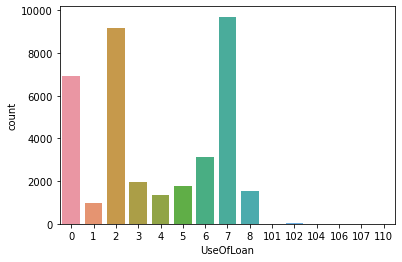

In [50]:
sns.countplot(modifed_data.UseOfLoan)

In [72]:
# Group 0: Loan Consolidation
loan_consolidation = [0]

# Group 1: Personal
personal = [2, 4, 5, 6, 8]

# Group 2: Business
business = [1, 3, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

modifed_data['UseOfLoan'] = modifed_data['UseOfLoan'].replace({i: 'Loan Consolidation' for i in loan_consolidation})\
                           .replace({i: 'Personal' for i in personal})\
                           .replace({i: 'Business' for i in business})


In [74]:
modifed_data['UseOfLoan'] = modifed_data['UseOfLoan'].replace({7: 'Other'UseOfLoan})


<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

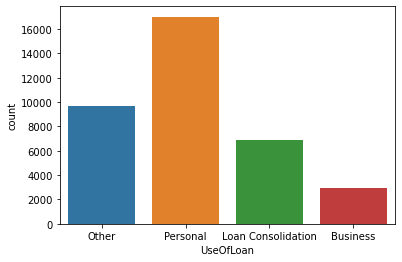

In [75]:
sns.countplot(modifed_data.UseOfLoan)

In [77]:
modifed_data.columns

Index(['VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'EmploymentPosition', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'Rating', 'Status'],
      dtype='object')

# EDA

In [81]:
numeric_features = modifed_data.select_dtypes(include=[np.number])
numeric_features.dtypes

VerificationType        float64
LanguageCode              int64
Age                       int64
AppliedAmount           float64
Amount                  float64
Interest                float64
LoanDuration              int64
MonthlyPayment          float64
Education               float64
EmploymentStatus        float64
OccupationArea          float64
HomeOwnershipType       float64
IncomeTotal             float64
ExistingLiabilities       int64
LiabilitiesTotal        float64
RefinanceLiabilities      int64
DebtToIncome            float64
FreeCash                float64
dtype: object

In [126]:
corr =numeric_features.corr()
corr

,VerificationType,LanguageCode,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash
VerificationType,1.000000,-0.080714,-0.062024,0.085339,0.164207,-0.204733,0.042771,-0.130125,-0.005835,-0.096816,-0.006842,0.079536,-0.119102,0.330802,0.013828,0.267951,0.192282,-0.056987
LanguageCode,-0.080714,1.000000,0.121473,0.093473,-0.001078,0.463720,0.115355,0.195177,-0.026994,0.068786,0.008308,-0.018858,-0.055782,-0.025773,0.105422,-0.049627,0.076199,0.070933
Age,-0.062024,0.121473,1.000000,0.097251,0.091586,-0.069617,0.112121,0.005294,0.083804,0.303463,0.043113,-0.008515,-0.030994,0.081154,0.078042,0.002207,0.036994,0.031785
AppliedAmount,0.085339,0.093473,0.097251,1.000000,0.854283,-0.007389,0.361760,0.604783,0.040538,0.054311,0.013627,0.067711,-0.084868,0.183192,0.132365,0.191238,0.329974,0.054198
Amount,0.164207,-0.001078,0.091586,0.854283,1.000000,-0.122477,0.340253,0.350943,0.038457,0.041835,0.016976,0.079060,-0.108449,0.250548,0.120674,0.273166,0.278329,0.046697
Interest,-0.204733,0.463720,-0.069617,-0.007389,-0.122477,1.000000,-0.058481,0.410104,-0.045061,-0.008293,-0.008715,-0.055568,0.000119,-0.068139,0.028969,-0.047120,0.140201,-0.006806
LoanDuration,0.042771,0.115355,0.112121,0.361760,0.340253,-0.058481,1.000000,-0.159918,-0.054278,0.030373,0.002834,0.007761,-0.242088,0.168337,0.058005,0.086152,0.159911,0.042583
MonthlyPayment,-0.130125,0.195177,0.005294,0.604783,0.350943,0.410104,-0.159918,1.000000,0.043865,0.044968,0.015135,0.005706,0.118291,-0.065362,0.154661,-0.059246,0.327445,-0.000016
Education,-0.005835,-0.026994,0.083804,0.040538,0.038457,-0.045061,-0.054278,0.043865,1.000000,-0.010797,0.200363,0.032305,0.050237,0.028293,0.040568,-0.022877,-0.030777,0.027615
EmploymentStatus,-0.096816,0.068786,0.303463,0.054311,0.041835,-0.008293,0.030373,0.044968,-0.010797,1.000000,-0.109030,-0.019984,-0.004869,-0.029655,0.028197,-0.028527,-0.014090,0.021730


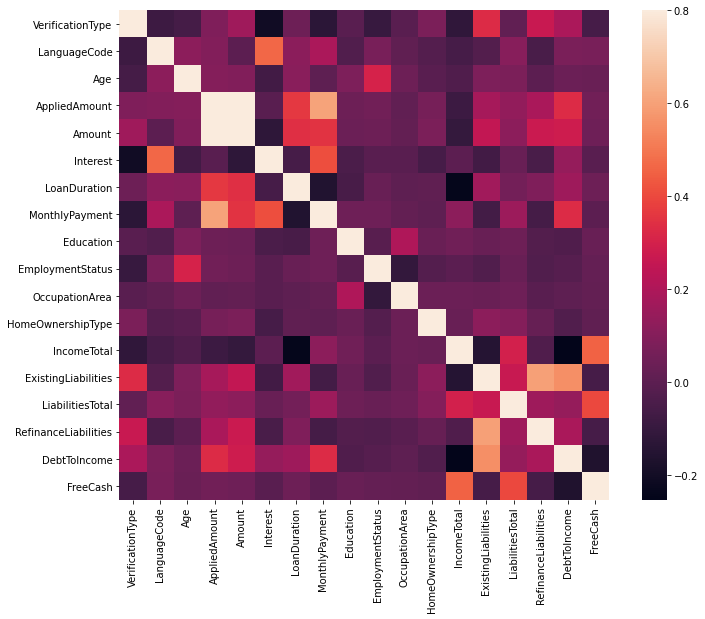

In [127]:
# correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

# Bivariant analysis between amount and education

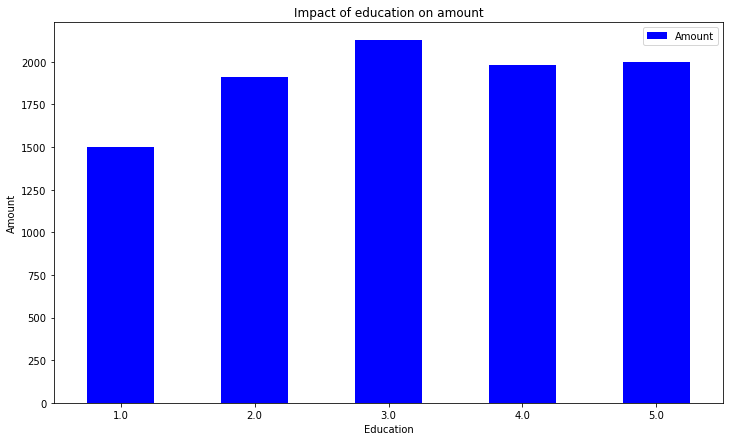

In [131]:
Education_pivot = modifed_data.pivot_table(index='Education', values="Amount", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Education")
plt.ylabel("Amount")
plt.title("Impact of education on amount")
plt.xticks(rotation=0)
plt.show()


# Income and monthly payment

In [ ]:
Education_pivot = modifed_data.pivot_table(index='MonthlyPayment', values="IncomeTotal", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("MonthlyPayment")
plt.ylabel("IncomeTotal")
plt.title("Impact of education on amount")
plt.xticks(rotation=0)
plt.show()


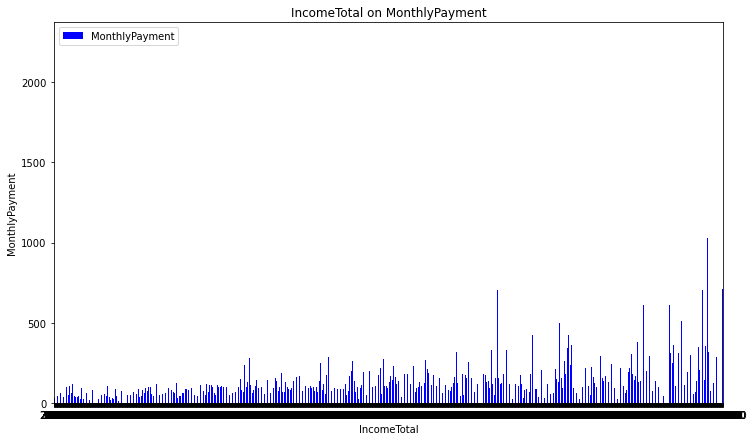

In [144]:
Education_pivot = modifed_data.pivot_table(index='IncomeTotal', values="MonthlyPayment", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("IncomeTotal")
plt.ylabel("MonthlyPayment")
plt.title("IncomeTotal on MonthlyPayment")
plt.xticks(rotation=0)
plt.show()


# Age on Amount

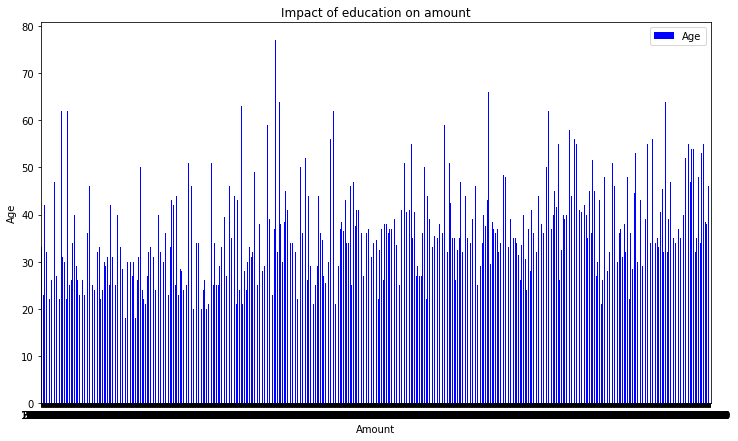

In [143]:
Education_pivot = modifed_data.pivot_table(index='Amount', values="Age", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Amount")
plt.ylabel("Age")
plt.title("Impact of education on amount")
plt.xticks(rotation=0)
plt.show()


In [140]:
encode = preprocessing.LabelEncoder()
modifed_data['UseOfLoan'] = encode.fit_transform(modifed_data['UseOfLoan'])

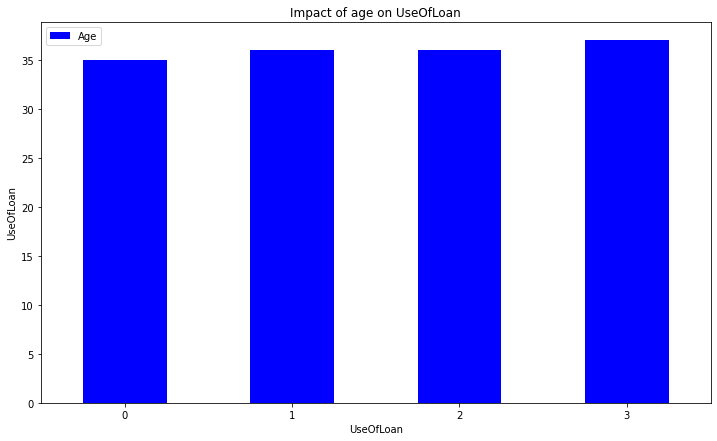

In [142]:
Education_pivot = modifed_data.pivot_table(index='UseOfLoan', values="Age", aggfunc=np.median)
Education_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("UseOfLoan")
plt.ylabel("UseOfLoan")
plt.title("Impact of age on UseOfLoan")
plt.xticks(rotation=0)
plt.show()
